In [5]:
from __future__ import print_function
import numpy as np
import pandas as pd
from tensorflow.python import keras
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install --upgrade absl-py


Looking in indexes: http://aicentro-nexus-svc:8081/hub-nexus/repository/pypi-group/simple
Requirement already up-to-date: absl-py in /usr/local/lib/python3.6/dist-packages (0.9.0)
You should consider upgrading via the 'pip install --upgrade pip' command.


# SACP AI 포탈과 연계를 위한 기본 객체 생성

In [6]:
from aicentro.session import Session
sacp_session = Session(verify=False)

# 학습 모델 개발 시 프레임워크별 객체 사용


In [7]:
from aicentro.framework.keras import Keras as SacpFrm
sacp_framework = SacpFrm(session=sacp_session)


# 모델 코드 작성


In [8]:
batch_size = 128
num_classes = 3
epochs = 100

data = load_iris()

X = data.data
y = data.target
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values


X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=1)

model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________



# 모델 학습 시 Accuracy 와 Loss 값을 SACP AI 포탈로 전송하여 UI 상에 노출
* 제공된 Metric Callback 사용 

In [9]:
history = sacp_framework.get_metric_callback()

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[history])

y_test_pred = model.predict(X_test, batch_size=128, verbose=1)
y_label = data.target_names.tolist()

y_test_c = np.argmax(y_test, axis=1).reshape(-1, 1)
y_test_pred_c = np.argmax(y_test_pred, axis=1).reshape(-1, 1)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/sample - loss: 1.2275 - acc: 0.3083 - val_loss: 0.9170 - val_acc: 0.4333
Epoch 2/100
120/120 [==============================] - 0s 337us/sample - loss: 1.1273 - acc: 0.3083 - val_loss: 0.8706 - val_acc: 0.5333
Epoch 3/100
120/120 [==============================] - 0s 468us/sample - loss: 1.0407 - acc: 0.3417 - val_loss: 0.8371 - val_acc: 0.8000
Epoch 4/100
120/120 [==============================] - 0s 341us/sample - loss: 0.9676 - acc: 0.5750 - val_loss: 0.8158 - val_acc: 0.8000
Epoch 5/100
120/120 [==============================] - 0s 306us/sample - loss: 0.9085 - acc: 0.6333 - val_loss: 0.8072 - val_acc: 0.8000
Epoch 6/100
120/120 [==============================] - 0s 286us/sample - loss: 0.8653 - acc: 0.6333 - val_loss: 0.8073 - val_acc: 0.9000
Epoch 7/100
120/120 [==============================] - 0s 309us/sample - loss: 0.8342 - acc: 0.7583 - val_loss: 0.8128 - val_acc: 0.566

# 모델 학습 후 결과를 저장하고 해당 결과를 UI 상에 노출

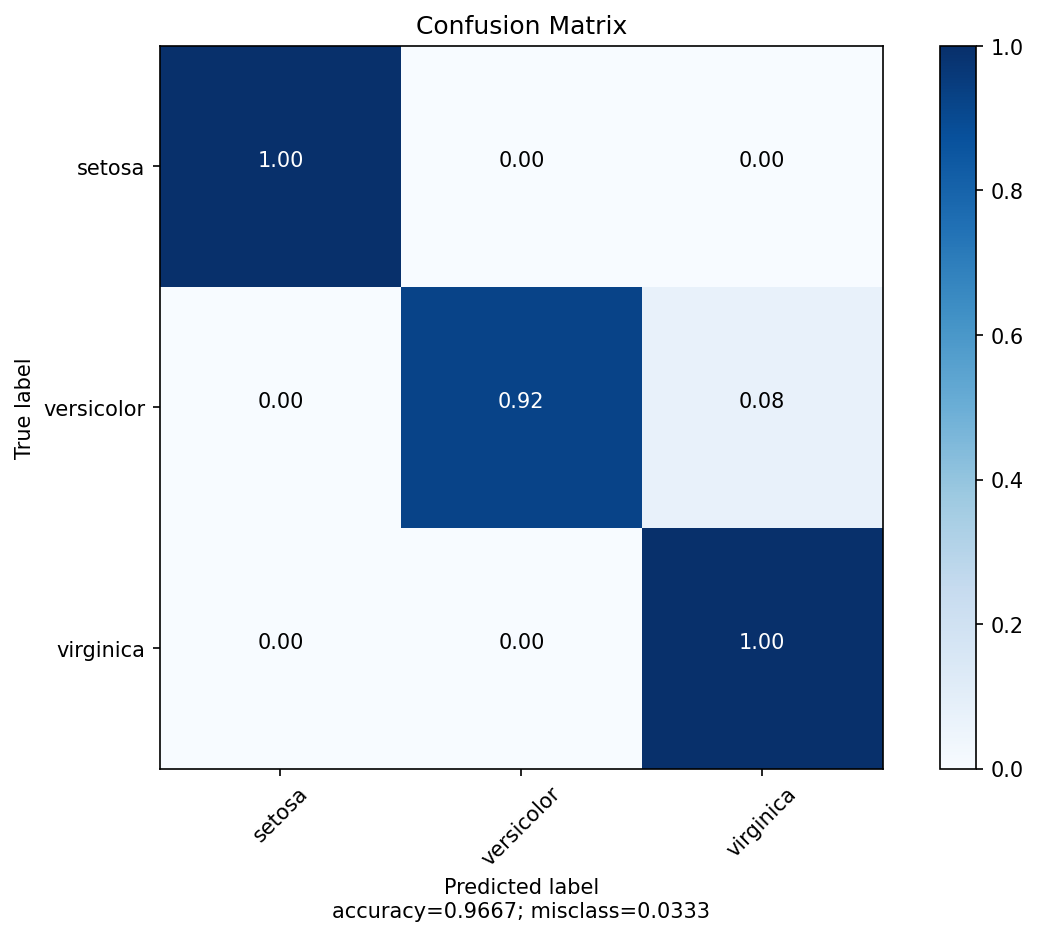

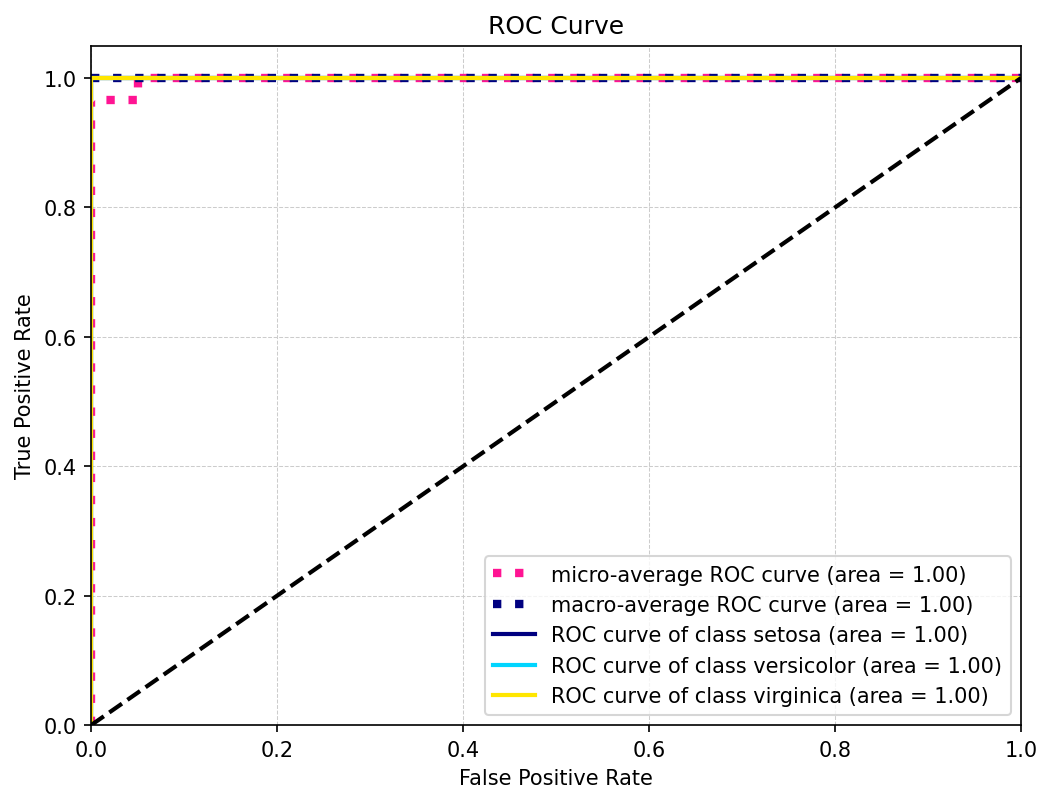

In [10]:
sacp_framework.plot_confusion_matrix(y_test_c, y_test_pred_c, target_names=y_label, title='Confusion Matrix')
sacp_framework.classification_report(y_test_c, y_test_pred_c, target_names=y_label)
sacp_framework.plot_roc_curve(y_test, y_test_pred, len(y_label), y_label)

# 학습된 모델 저장

In [11]:
sacp_framework.save_model(model, model_name='iris-classification')

In [12]:
!ls -R /task/model/

/task/model/:
1

/task/model/1:
iris-classification.h5
